In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [9]:
df = pd.read_csv('ex2data2.txt', header=None)
X = df[[0, 1]].values
y = df[[2]].values

In [20]:
Xbar = PolynomialFeatures(6).fit_transform(X)

28

In [84]:
regr = Ridge(alpha=0.2,fit_intercept=False)
regr.fit(Xbar, y)

Ridge(alpha=0.2, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [85]:
result_theta = regr.coef_.reshape((-1, 1))

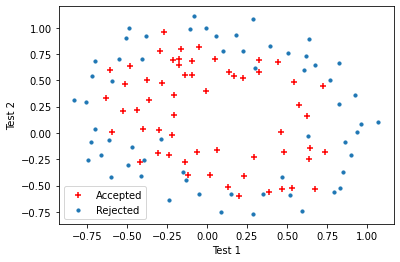

In [86]:
pos , neg = (y==1).reshape(118,1) , (y==0).reshape(118,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.legend(["Accepted","Rejected"],loc=0)
plt.show()

In [87]:
pos_lab, neg_lab = (y==1).flatten(), (y==0).flatten()
x1 = np.linspace(-1, 1.2, 50)
x2 = np.linspace(-1, 1.2, 50)
def draw_contour(result_theta):
    z = np.zeros((x1.shape[0], x1.shape[0]))
    for i in range(len(x1)):
        for j in range(len(x2)):
            tmpX = np.array([[x1[i], x2[j]]])
            features_mapped_tmpXIJ = PolynomialFeatures(6).fit_transform(tmpX)
            z[i][j] = np.sum( features_mapped_tmpXIJ @ result_theta)
    plt.contour(x1, x2, z, levels=[.5])
    plt.plot(X[pos_lab, 0], X[pos_lab, 1], 'g^', label='Accepted')
    plt.plot(X[neg_lab, 0], X[neg_lab, 1], 'ro', label='Rejected')
    plt.xlabel('Test 1 result')
    plt.ylabel('Test 2 result')
    plt.legend()
    plt.show()

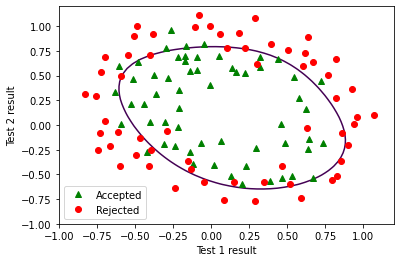

In [89]:
draw_contour(result_theta)

In [126]:
def predictor(result_theta, Xbar, y):
    prediction = sum(((Xbar @ result_theta) >= 0.5).flatten())
    return sum((1 - abs(prediction - sum(y==1))/max(prediction, sum(y==1))) * 100)

Train Accuracy: [49.15254237] %
